In [1]:
using Plots
include("../../src/UniversalDiffEq.jl" )
include("OpenAccessFishery.jl")

Main.OpenAccessFishery

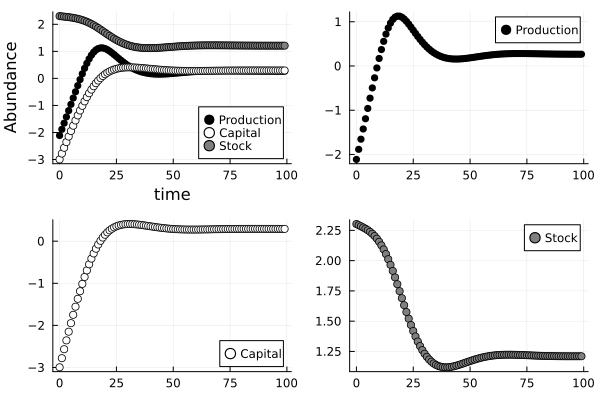

In [2]:

data = OpenAccessFishery.simulate_data(OpenAccessFishery.stable_eq,nsteps = 100,tspan = [0.0,100],sigma = [0.0,0.0,0.0])
p1,p2,p3,p4 = OpenAccessFishery.plot_simulation(data)
plot(p1,p2,p3,p4)

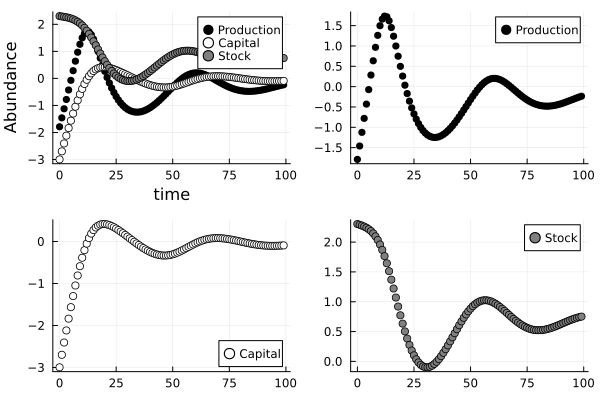

In [3]:
data = OpenAccessFishery.simulate_data(OpenAccessFishery.damped_osc,nsteps = 100,tspan = [0.0,100],sigma = [0.0,0.0,0.0])
p1,p2,p3,p4 = OpenAccessFishery.plot_simulation(data)
plot(p1,p2,p3,p4)

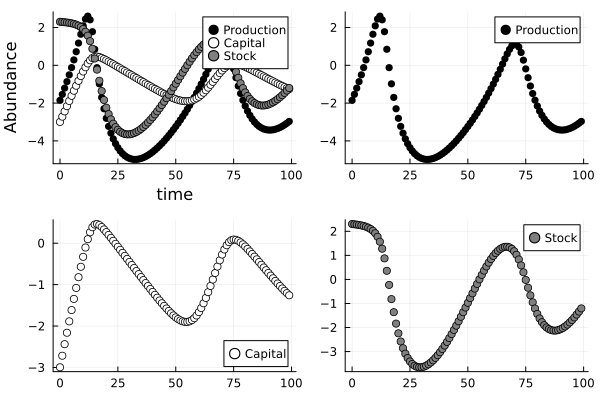

In [4]:
data = OpenAccessFishery.simulate_data(OpenAccessFishery.limit_cyc,nsteps = 100,tspan = [0.0,100],sigma = [0.0,0.0,0.0])
p1,p2,p3,p4 = OpenAccessFishery.plot_simulation(data)
plot(p1,p2,p3,p4)

In [5]:

stable_eq = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.11,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.25,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.075,sigma_K = 0.075)

data = OpenAccessFishery.simulate_data(stable_eq,nsteps = 80,tspan = [0.0,80],
                                sigma = [0.0,0.0,0.0],variables = ["Capital","Stock"])
data[1:6,:]

Row,t,Capital,Stock
,Float64,Float64,Float64
1,0.0,-2.99573,2.30259
2,1.0,-2.75334,2.23675
3,2.0,-2.49123,2.24451
4,3.0,-2.21512,2.31407
5,4.0,-2.0144,2.2018
6,5.0,-1.87435,2.23106


In [6]:
# initial neurla Network
using Random, Lux
dims_in = 2; dims_out = 1; hidden = 10
Random.seed!(1);rng = Random.default_rng() 
NN = Lux.Chain(Lux.Dense(dims_in,hidden,tanh), Lux.Dense(hidden,dims_out))
NN_predict, NN_states = Lux.setup(rng,NN) 

initial_parameters = (NN=NN_predict,r = 0.5,K=10.0,delta=0.05,a=0.2,pi=0.01)


function derivs(du,u,p,t)
    X = u[1];K = u[2]
    CPUE = NN(u,p.NN,NN_states)[1][1]
    dX = p.r*X*(1-X/p.K) - CPUE * K
    dK = -1*p.delta*K
    dK += p.a*(CPUE-p.pi)*K
    du[1] = dX; du[2] = dK
end 

nothing

In [7]:
model = UniversalDiffEq.CustomDerivs(data,derivs,initial_parameters)
nothing

In [8]:
UniversalDiffEq.gradient_decent!(model,verbos = true, maxiter = 500)

2.671 2.485 2.309 2.144 1.987 1.838 1.699 1.572 1.457 1.347 1.245 1.146 1.054 0.97 0.897 0.827 0.757 0.695 0.642 0.592 0.542 0.496 0.458 0.423 0.387 0.354 0.328 0.302 0.275 0.252 0.234 0.215 0.196 0.179 0.166 0.151 0.138 0.126 0.116 0.105 0.096 0.087 0.079 0.071 0.065 0.059 0.052 0.047 0.043 0.038 0.034 0.031 0.028 0.025 0.023 0.021 0.019 0.018 0.017 0.016 0.015 0.014 0.013 0.012 0.011 0.011 0.011 0.01 0.009 0.009 0.009 0.009 0.008 0.008 0.008 0.008 0.007 0.007 0.007 0.007 0.007 0.007 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 

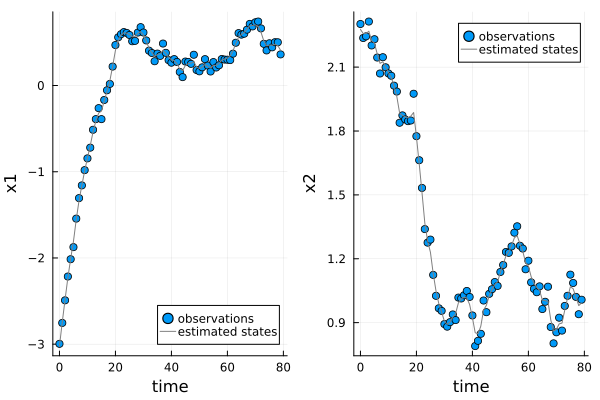

In [9]:
UniversalDiffEq.plot_state_estiamtes(model)

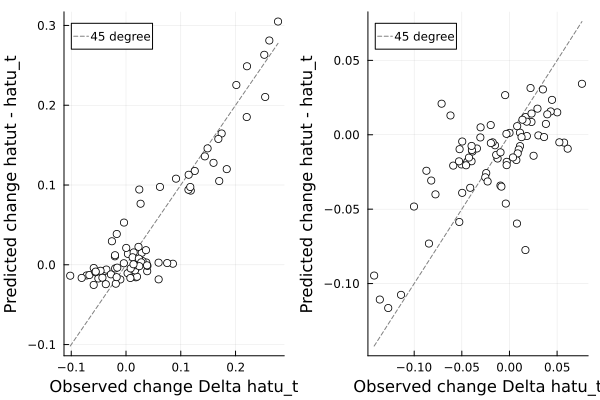

In [10]:
UniversalDiffEq.plot_predictions(model)

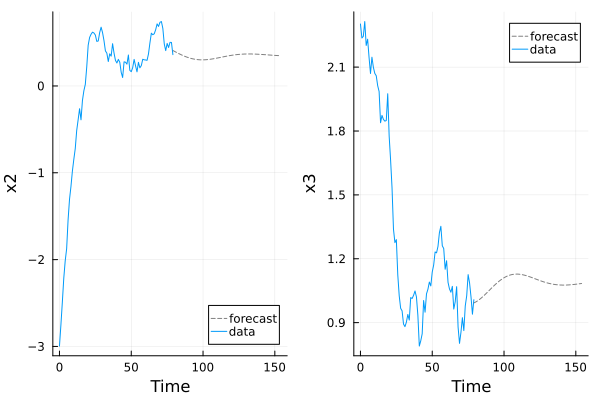

In [11]:
UniversalDiffEq.plot_forecast(model, 75)

In [ ]:
MSE, training_data, testing_data, standard_error, predicted_data = UniversalDiffEq.leave_future_out_cv(model;forecast_length = 20,  
                                            forecast_number = 5, spacing = 10, step_size = 0.05, maxiter = 500)

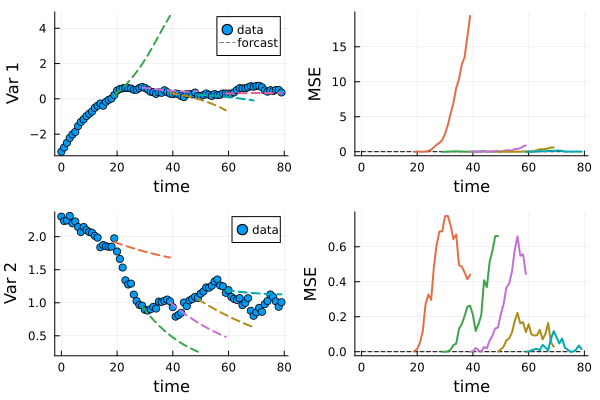

In [13]:
include("simulation_tests.jl")
plot_sim_test(data,MSE, training_data, testing_data, standard_error, predicted_data)

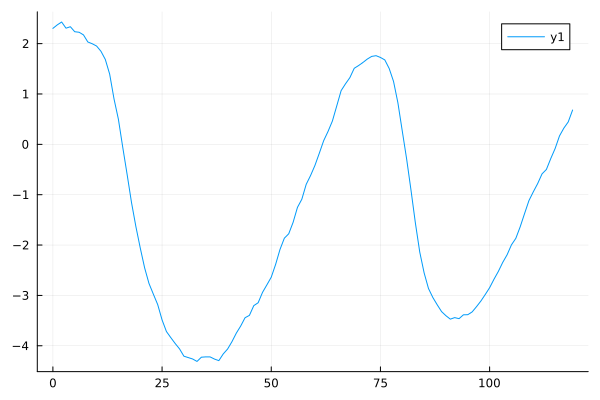

In [14]:
stable_eq = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.11,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.25,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.05,sigma_K = 0.05)

damped_osc = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.25,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.0,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.05,sigma_K = 0.05)

limit_cyc = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.65,
            tech_imporvement = 0.0,handeling_time = 0.3,k= 1.1,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.05,sigma_K = 0.05)


params = (stable_eq,damped_osc,limit_cyc)

function data_generator_()
    pars = params[rand(1:3)]
    OpenAccessFishery.simulate_data(pars,nsteps = 120,tspan = [0.0,120],sigma=[0.0,0.0,0.0],variables=["Capital","Stock"])
end

data = data_generator_()
Plots.plot(data.t, data.Stock)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

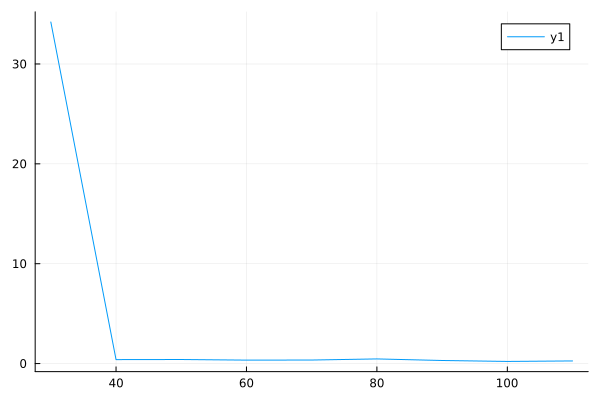

In [29]:
include("simulation_tests.jl")

forecast_length = 10
forecast_number = 9
spacing = 10

SEs, data_quantity = simulation_tests(data_generator_,model,forecast_length,forecast_number,spacing;Nsims = 50,maxiter=250,stepsize=0.05)
Plots.plot(data_quantity,SEs)

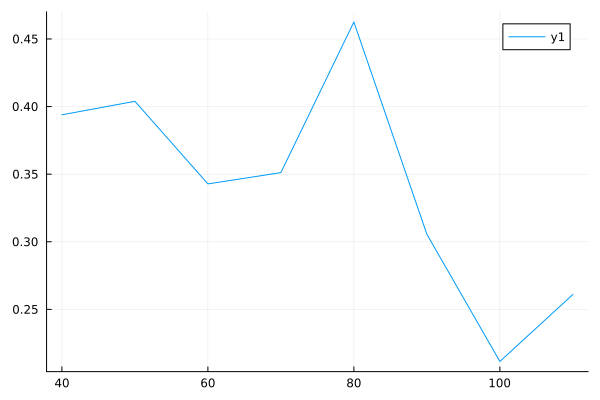

In [30]:
Plots.plot(data_quantity[2:end],SEs[2:end])

In [10]:
# parameters
k = OpenAccessFishery.damped_osc.k
handeling_time = OpenAccessFishery.damped_osc.handeling_time
search_efficancy = OpenAccessFishery.damped_osc.search_efficancy_0
threshold_CPUE = OpenAccessFishery.damped_osc.threshold_CPUE
entry = OpenAccessFishery.damped_osc.entry

function interaction_term(u)
    X = exp(u[1]); K = exp(u[2])
    CPUE = search_efficancy*X^k/(1 + handeling_time*search_efficancy*X^k)
    dX = -CPUE * K
    dK = entry*(CPUE-threshold_CPUE)*K
    return [1/X,1/K].*[dX,dK]
end 


pars = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.25,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.0,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.05,sigma_K = 0.025)


data = OpenAccessFishery.simulate_data(pars,nsteps = 50,tspan = [0.0,100],
                                sigma = [0.0,0.0,0.0],variables = ["Capital","Stock"])

model = ContinuousModelErrors(data,interaction_term, proc_weight=2.0,obs_weight=0.5, reg_weight = 10^-8)
p1,p2,p3,p4=OpenAccessFishery.plot_simulation(data)
plot(p1,p3,p4)

LoadError: UndefVarError: ContinuousModelErrors not defined

In [ ]:
gradient_decent!(model,verbos = true, maxiter = 500, step_size = 0.05)

In [ ]:
plot_state_estiamtes(model)

In [ ]:
plot_predictions(model)

In [ ]:
plot_forecast(model,20)

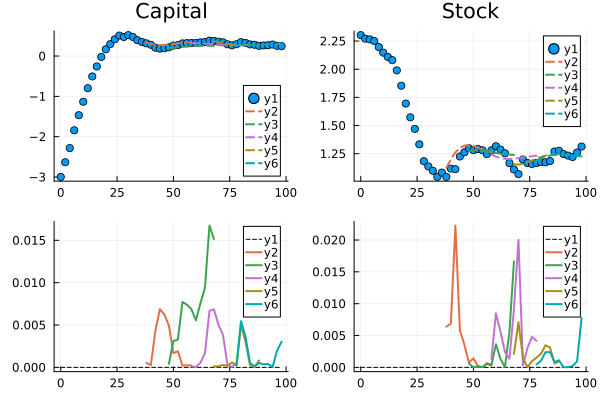

In [204]:
model1 = SSNODE(data,proc_weight=2.0,obs_weight=0.5, reg_weight = 0.0)
MSE, training_data, testing_data, standard_error, predicted_data = leave_future_out_cv(model1;forecast_length = 10,  
                                            forecast_number = 5, spacing = 5, step_size = 0.05, maxiter = 500)

UniversalDiffEq.plot_leave_future_out_cv(model1.data_frame,testing_data, standard_error , predicted_data)

plot(p1,p2,layout = (2,1))